In [ ]:
import os
from io import open
from random import random

import gradio as gr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [3]:
pd.options.display.max_columns = 150


In [5]:
data = pd.read_csv("data-final.csv", sep="\t")


In [6]:
data.drop(data.columns[50:110], axis=1, inplace=True)


In [7]:
pd.options.display.float_format = "{:.2f}".format


In [8]:
data = data[(data > 0.00).all(axis=1)]


In [9]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2, 10))


In [10]:
data_sample = data.sample(n=5000, random_state=1)


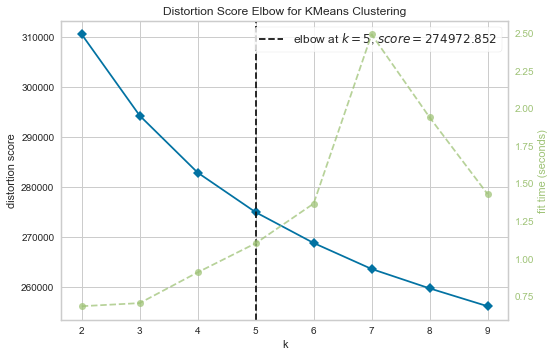

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
visualizer.fit(data_sample)
visualizer.poof()


In [42]:
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(data)


In [43]:
predicoes = k_fit.labels_


In [44]:
data['Cluseters'] = predicoes


In [45]:
data['Clusters'] = predicoes


In [46]:
data.head()


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,Cluseters,Clusters
0,4.00,1.00,5.00,2.00,5.00,1.00,5.00,2.00,4.00,1.00,1.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,3.00,2.00,2.00,5.00,2.00,4.00,2.00,3.00,2.00,4.00,3.00,4.00,3.00,4.00,3.00,2.00,2.00,4.00,4.00,2.00,4.00,4.00,5.00,1.00,4.00,1.00,4.00,1.00,5.00,3.00,4.00,5.00,3,3
1,3.00,5.00,3.00,4.00,3.00,3.00,2.00,5.00,1.00,5.00,2.00,3.00,4.00,1.00,3.00,1.00,2.00,1.00,3.00,1.00,1.00,4.00,1.00,5.00,1.00,5.00,3.00,4.00,5.00,3.00,3.00,2.00,5.00,3.00,3.00,1.00,3.00,3.00,5.00,3.00,1.00,2.00,4.00,2.00,3.00,1.00,4.00,2.00,5.00,3.00,0,0
2,2.00,3.00,4.00,4.00,3.00,2.00,1.00,3.00,2.00,5.00,4.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,1.00,4.00,1.00,4.00,2.00,4.00,1.00,4.00,4.00,3.00,4.00,2.00,2.00,2.00,3.00,3.00,4.00,2.00,4.00,2.00,5.00,1.00,2.00,1.00,4.00,2.00,5.00,3.00,4.00,4.00,0,0
3,2.00,2.00,2.00,3.00,4.00,2.00,2.00,4.00,1.00,4.00,3.00,3.00,3.00,2.00,3.00,2.00,2.00,2.00,4.00,3.00,2.00,4.00,3.00,4.00,2.00,4.00,2.00,4.00,3.00,4.00,2.00,4.00,4.00,4.00,1.00,2.00,2.00,3.00,1.00,4.00,4.00,2.00,5.00,2.00,3.00,1.00,4.00,4.00,3.00,3.00,1,1
4,3.00,3.00,3.00,3.00,5.00,3.00,3.00,5.00,3.00,4.00,1.00,5.00,5.00,3.00,1.00,1.00,1.00,1.00,3.00,2.00,1.00,5.00,1.00,5.00,1.00,3.00,1.00,5.00,5.00,3.00,5.00,1.00,5.00,1.00,3.00,1.00,5.00,1.00,5.00,5.00,5.00,1.00,5.00,1.00,5.00,1.00,5.00,3.00,5.00,5.00,3,3


In [47]:
data['Clusters'].value_counts()


2    193586
0    182116
3    182044
4    170947
1    145741
Name: Clusters, dtype: int64

In [48]:
data.groupby('Clusters').mean()


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,Cluseters
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2.14,3.28,3.12,3.65,2.99,2.70,2.23,4.00,2.33,4.12,3.54,3.08,4.16,2.62,2.83,2.81,2.87,2.44,2.97,2.70,1.86,3.98,1.67,4.38,1.96,4.18,1.99,4.00,4.19,3.73,3.85,2.22,4.29,2.02,3.25,2.06,4.17,2.02,3.84,3.89,3.56,2.16,3.88,2.08,3.71,2.00,4.00,2.96,4.26,3.78,0.00
1,2.16,3.44,2.80,3.59,2.62,2.86,2.12,3.71,2.70,3.99,2.44,3.72,3.13,3.00,2.40,2.11,2.40,2.01,2.71,2.38,3.09,3.00,2.67,2.86,3.28,2.75,3.14,2.95,2.69,3.07,3.28,2.92,3.83,2.48,2.43,2.82,3.55,2.59,2.88,3.51,3.73,1.96,3.80,2.05,3.80,2.05,4.09,3.31,3.91,3.85,1.00
2,3.46,1.91,3.80,2.50,4.06,1.82,3.66,2.76,3.78,2.99,3.83,2.95,4.25,2.42,3.28,3.48,3.81,3.46,3.65,3.18,2.14,4.30,2.66,4.20,2.00,4.02,1.85,3.91,4.14,3.86,2.99,3.62,3.85,3.24,2.23,3.52,3.47,2.83,2.95,3.49,3.78,2.10,4.27,1.95,3.98,1.76,4.00,3.40,4.21,4.21,2.00
3,3.47,1.95,4.34,2.22,4.27,1.67,3.88,2.81,3.75,2.52,2.32,3.85,3.14,3.32,2.11,1.90,2.10,1.67,2.11,1.72,1.89,4.45,1.84,4.25,1.87,3.85,1.60,4.10,4.09,4.20,3.75,2.59,4.19,1.90,3.13,2.29,3.88,1.95,3.58,3.89,3.91,1.75,4.10,1.79,4.17,1.66,4.33,3.25,4.11,4.29,3.00
4,1.81,3.63,2.24,4.06,2.30,3.18,1.75,4.08,2.17,4.49,4.29,2.46,4.53,2.13,3.57,3.90,4.01,3.78,4.01,3.96,2.45,3.39,2.58,3.86,2.55,3.88,2.70,3.45,3.69,3.06,2.82,3.38,3.82,3.49,2.08,3.50,3.57,3.05,2.78,3.32,3.52,2.38,4.08,2.12,3.43,2.09,3.69,3.19,4.29,3.72,4.00


In [49]:
col_list = list(data)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]


In [50]:
data_clusters = data_soma = pd.DataFrame()
data_soma["Extrovertido"] = data[ext].sum(axis=1) / 10
data_soma["Neurótico"] = data[est].sum(axis=1) / 10
data_soma["Agradável"] = data[agr].sum(axis=1) / 10
data_soma["Consciente"] = data[csn].sum(axis=1) / 10
data_soma["Receptivo"] = data[opn].sum(axis=1) / 10
data_soma["clusters"] = predicoes


In [51]:
data_clusters = data_soma.groupby('clusters').mean()


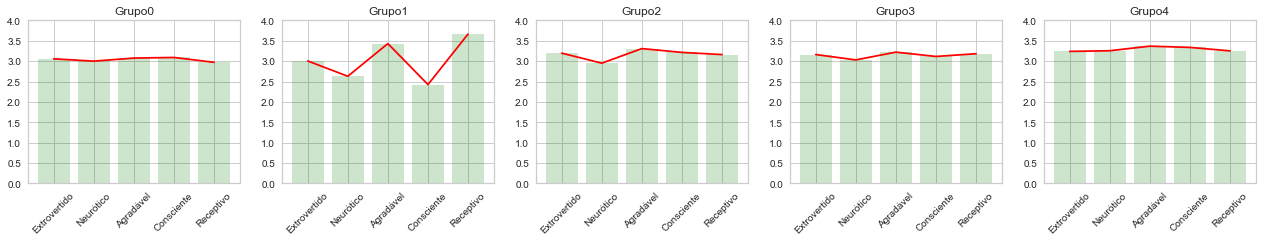

In [52]:
plt.figure(figsize=(22, 3))
for i in range(0, 5):
    plt.subplot(1, 5, i + 1)
    plt.bar(data_clusters.columns,
            data_clusters.iloc[:, i], color="green", alpha=0.2)
    plt.plot(data_clusters.columns, data_clusters.iloc[:, i], color="red")
    plt.title("Grupo" + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0, 4)


In [53]:
data[:0].to_excel("perguntas.xlsx", index=False)

In [54]:
meus_dados = pd.read_excel('perguntas.xlsx')

In [ ]:
grupo_personalidade = k_fit.predict(meus_dados)[0]
print('Meu grupo de personalidade é: ', grupo_personalidade)